In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fictitious Play


In [166]:
# Initialize distributions at t=0 and the matrix
n = 80
xt = np.array([1/n for i in range(n)])
yt = np.array([1/n for i in range(n)])

M = np.random.rand(n,n)
eta = 0.1
X,Y = [], []
T = 20000

for i in range(T):
    new_xt = xt * np.exp(-eta * np.dot(M, yt))
    xt = new_xt/np.sum(new_xt)
    X.append(xt)
    new_yt = yt * np.exp(eta * np.dot(M, xt))
    Y.append(new_yt/np.sum(new_yt))

X, Y = np.array(X), np.array(Y)
# Z = np.sqrt(np.sum(np.abs(X-Y),axis=1))

# plt.figure()
# plt.scatter([i for i in range(T)], Z, color="green")
# plt.show()

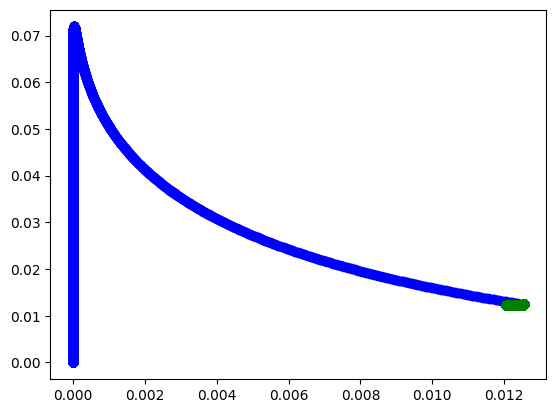

In [167]:
plt.scatter(X[:,0], X[:,1], color="blue")
plt.scatter(Y[:,0], Y[:,1], color="green")

In [168]:
np.exp(-eta * np.dot(M, y0))

ValueError: shapes (80,80) and (2,) not aligned: 80 (dim 1) != 2 (dim 0)

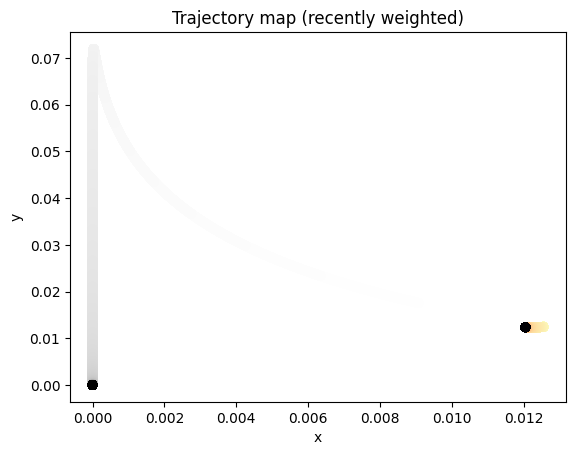

In [170]:
# Create an array of indices; later points have higher indices.
indices = np.arange(T)
# Normalize indices to the range [0, 1]
norm_indices = indices / (T - 1)

# Use a colormap where higher values are darker.
# Here, 'gray_r' reverses the standard gray colormap: 0 becomes white, 1 becomes black.
plt.scatter(X[:,0], X[:,1], c=norm_indices, cmap='gray_r')
plt.scatter(Y[:,0], Y[:,1], c=norm_indices, cmap='magma_r')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory map (recently weighted)')
plt.show()

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [240]:
c11 = {"h15", "h26", "h2", "h30", "h32", "h39", "h40", "h42", "h45", "h7"}
c21 = {"h11", "h12", "h14", "h20", "h22", "h24", "h25", "h29", "h35", "h36", "h37", "h38", "h44", "h47"}
c31 = {"h11", "h12", "h14", "h15", "h26", "h30", "h39", "h42"}
c41 = {"h15", "h22", "h24","h25", "h26", "h32", "h39", "h42"}

c12 = {"h12", "h17", "h20", "h23", "h27", "h28", "h35", "h39", "h3", "h9"}
c22 = {"h12", "h17", "h18", "h19", "h20", "h21", "h35", "h39"}
c32 = {"h12", "h13", "h14", "h15", "h17", "h28", "h35", "h39"}
c42 = {"h13", "h14", "h15", "h18", "h19", "h21", "h32", "h33", "h36", "h38", "h42", "h43", "h46", "h47"}

c13 = {"h1", "h27", "h39", "h40"}
c23 = {"h16", "h17", "h18", "h19", "h21", "h39", "h40", "h4", "h6", "h9"}
c33 = {"h11", "h12", "h13", "h14", "h15", "h1", "h2", "h39", "h3", "h5"}
c43 = {"h10", "h22", "h24", "h25", "h26", "h27", "h31", "h39", "h7", "h8"}

c14 = {"h1", "h21", "h24", "h29", "h33", "h39", "h41", "h47", "h4", "h8"}
c24 = {"h16", "h17", "h18", "h21", "h24", "h29", "h39", "h47"}
c34 = {"h16", "h17", "h18", "h25", "h26", "h28", "h30", "h31", "h34", "h35", "h37", "h38", "h42", "h46"}
c44 = {"h21", "h24", "h25", "h26", "h31", "h33", "h39", "h47"}

c1 = c11.union(c21).union(c31).union(c41)
c2 = c12.union(c22).union(c32).union(c42)
c3 = c13.union(c23).union(c33).union(c43)
c4 = c14.union(c24).union(c34).union(c44)

c = c1.union(c2).union(c3).union(c4)

print(len(c)) #sanity check, should be 47

47


In [243]:
num_cols = {1: [], 2: [], 3: [], 4: []}

for i in c:
    num = (i in c1) + (i in c2) + (i in c3) + (i in c4)
    num_cols[num].append(i)

In [251]:
T=4
g1 = len(num_cols[1])
g2 = len(num_cols[2])
g3 = len(num_cols[3])
g4 = len(num_cols[4])

sum_gi = g1+g2+g3+g4
sum_i_gi = 1*g1+2*g2+3*g3+4*g4

p1 = g1/sum_gi
p2 = g2/sum_gi
p3 = g3/sum_gi
p4 = g4/sum_gi

q1 = 1*g1/sum_i_gi
q2 = 2*g2/sum_i_gi
q3 = 3*g3/sum_i_gi
q4 = 4*g4/sum_i_gi

mu_p = p2 * np.log(2) + p3 * np.log(3) + p4 * np.log(4)
mu_q = q2 * np.log(2) + q3 * np.log(3) + q4 * np.log(4)

sigma_square_p = p2 * (np.log(2))**2 + p3 * (np.log(3))**2 + p4 * (np.log(4))**2 - mu_p**2
sigma_square_q = q2 * (np.log(2))**2 + q3 * (np.log(3))**2 + q4 * (np.log(4))**2 - mu_q**2

epsilon1 = 0
epsilon2 = 0

var1 = np.log(T**(3-epsilon2)/sum_i_gi)

entanglement_rank = 1/np.sqrt(2*sigma_square_p*np.log(T)) * (mu_q - mu_p - np.sqrt(-2*sigma_square_q * var1))
entanglement_rank

-0.29057365022469633

In [256]:
np.log(21)/np.log(3)

2.771243749161422

24

In [254]:
g3

13

In [255]:
g4

1

In [7]:
import numpy as np 
11 - 1.5*np.sqrt(51)

0.28785735718572525